# Session 12 B7 SAKA - XGBoost



XGBoost, singkatan dari "eXtreme Gradient Boosting", adalah algoritma machine learning yang sangat populer dan efektif, terutama dalam kompetisi data science dan berbagai aplikasi praktis. Berikut adalah beberapa aspek kunci dari XGBoost:

**Konsep Dasar**
1. **Boosting**: XGBoost adalah bagian dari keluarga algoritma "boosting" yang bertujuan untuk meningkatkan kekuatan prediktif dengan menggabungkan banyak model yang lemah (biasanya pohon keputusan) menjadi satu model yang kuat. Algoritma ini beroperasi dengan menambahkan model secara iteratif, di mana setiap model baru mencoba memperbaiki kesalahan yang dibuat oleh model sebelumnya.

2. **Gradient Boosting**: XGBoost menggunakan teknik khusus yang disebut "gradient boosting", di mana setiap tahap dalam penambahan model baru berusaha mengurangi "gradient" dari fungsi kerugian (loss function), yang merupakan ukuran kesalahan antara prediksi dan nilai sebenarnya.

![](https://www.researchgate.net/publication/348025909/figure/fig2/AS:1020217916416002@1620250314481/Simplified-structure-of-XGBoost.ppm)




**Arsitektur XGBoost**

1. **Instance**: Ini adalah data input yang akan diprediksi oleh model. Dalam konteks klasifikasi, ini bisa berupa satu set fitur dari satu contoh yang ingin diklasifikasikan.

2. **Tree-1**: Pohon pertama (Tree-1) mencoba memprediksi target berdasarkan instance. Ini biasanya adalah pohon keputusan yang sederhana, juga disebut sebagai "weak learner".

3. **Result_1**: Hasil dari pohon pertama ini adalah prediksi awal untuk target. Prediksi ini kemungkinan besar tidak sempurna dan akan memiliki beberapa tingkat kesalahan.

4. **Residual**: Kesalahan prediksi pohon pertama (selisih antara prediksi dan nilai sebenarnya) disebut residual. Residual ini akan digunakan sebagai input untuk pohon selanjutnya agar dapat memperbaiki kesalahan yang ada.

5. **Tree-2**: Pohon kedua (Tree-2) kemudian dibangun dengan tujuan untuk memprediksi residual dari pohon pertama, bukan target asli. Ini berarti Tree-2 berusaha memperbaiki kesalahan yang dibuat oleh Tree-1.

6. **Result_2**: Hasil dari pohon kedua ini adalah prediksi terhadap residual. Prediksi ini akan ditambahkan ke prediksi sebelumnya untuk meningkatkan akurasi.

7. **Tree-3**: Proses ini berlanjut dengan pohon ketiga (Tree-3), yang kembali dibangun untuk memprediksi residual dari hasil gabungan Tree-1 dan Tree-2.

8. **Result_3**: Hasil dari pohon ketiga menawarkan perbaikan lebih lanjut, dan kembali, hasil ini ditambahkan ke hasil sebelumnya.

9. **Sum**: Hasil dari semua pohon (dalam diagram ini ada tiga pohon) kemudian dijumlahkan. Setiap pohon memberikan kontribusi untuk memperbaiki kesalahan dari hasil prediksi sebelumnya.

10. **Final Result**: Hasil penjumlahan dari semua pohon merupakan prediksi akhir model XGBoost. Dengan menggabungkan prediksi dari banyak pohon, XGBoost mencapai prediksi yang lebih akurat dan robust.

Proses ini, yang dikenal sebagai "ensemble learning", menggabungkan banyak model lemah untuk membuat satu model yang kuat. XGBoost melakukan ini dengan cara yang sangat efisien, yang memungkinkan untuk pemodelan prediktif yang sangat efektif pada dataset besar dan kompleks.

## 1. Load Dataset "Chiller.xlsx"

**ChatGPT Prompt:**

Berikan saya code python untuk menghubungkan google colab dengan google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**ChatGPT Prompt:**

Berikan code untuk load dataset "Chiller.xlsx' pada folder Dataset di google drive

In [2]:
# Mengimpor library pandas
import pandas as pd

# Menentukan path file Excel
file_path = '/content/drive/MyDrive/Dataset/Chiller.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dari dataframe
df.head()

Evap LWT  Evap EWT  Unit Capacity  Evap Sat Temperature  \
0       5.8       9.7           44.0                   1.6   
1       5.8       9.8           46.0                   1.4   
2       5.8       9.8           46.0                   2.3   
3       6.1      10.4           46.0                   2.3   
4       5.8       9.9           48.0                   2.0   

   Cond Sat Temperature  Suction Temperature  Discharge Temperature  \
0                  44.9                  6.6                   63.6   
1                  44.9                  6.6                   63.9   
2                  44.2                  7.6                   62.5   
3                  40.4                  6.8                   60.6   
4                  39.8                  7.0                   59.3   

   Oil Pressure  Run Hour Kompressor  Ampere Kompressor  No, Of Start  \
0        1007.2                17924              133.6          1336   
1        1007.2                17926              134.5          1336   
2         976.4                17927              132.7          1336   
3         844.0                17930              120.4          1336   
4         968.5                17931              118.5          1336   

   Tekanan Return Chiller  Tekanan Supply Chiller  Inlet Softwater  \
0                     5.0                     4.6              3.0   
1                     5.0                     4.6              3.0   
2                     5.0                     4.6              3.0   
3                     5.0                     4.6              3.0   
4                     5.0                     4.6              3.0   

   Tekanan Sebelum Pompa  Tekanan Sesudah Pompa  Ampere R-S  Ampere S-T  
0                    4.6                    6.4       143.0       146.2  
1                    4.6                    6.4       121.0       116.2  
2                    4.6                    6.4       134.2       133.5  
3                    4.6                    6.4       134.2       133.5  
4                    4.6                    6.4       134.2       133.5

## 2. EDA (Exploratory Data Analysis)

**ChatGPT Prompt:**

Berikan code untuk melakukan EDA pada dataset tersebut

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Evap LWT                1219 non-null   float64
 1   Evap EWT                1219 non-null   float64
 2   Unit Capacity           1219 non-null   float64
 3   Evap Sat Temperature    1219 non-null   float64
 4   Cond Sat Temperature    1219 non-null   float64
 5   Suction Temperature     1219 non-null   float64
 6   Discharge Temperature   1219 non-null   float64
 7   Oil Pressure            1219 non-null   float64
 8   Run Hour Kompressor     1219 non-null   int64  
 9   Ampere Kompressor       1219 non-null   float64
 10  No, Of Start            1219 non-null   int64  
 11  Tekanan Return Chiller  1219 non-null   float64
 12  Tekanan Supply Chiller  1219 non-null   float64
 13  Inlet Softwater         1219 non-null   float64
 14  Tekanan Sebelum Pompa

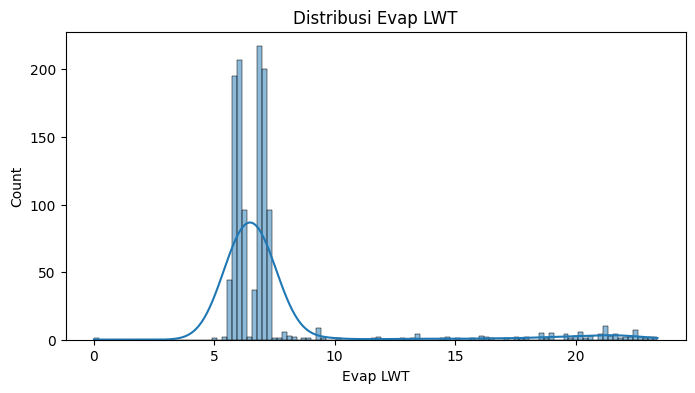

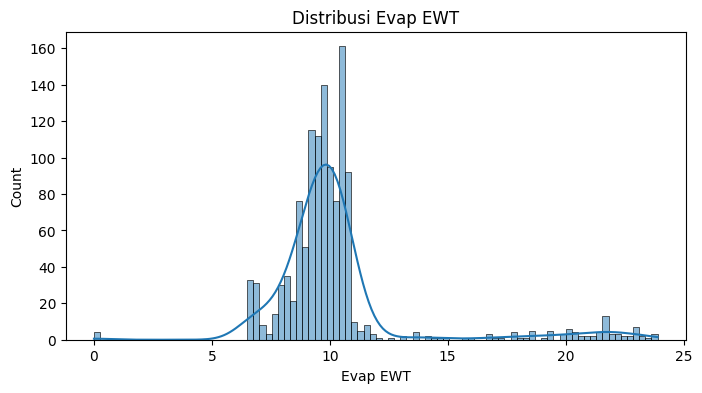

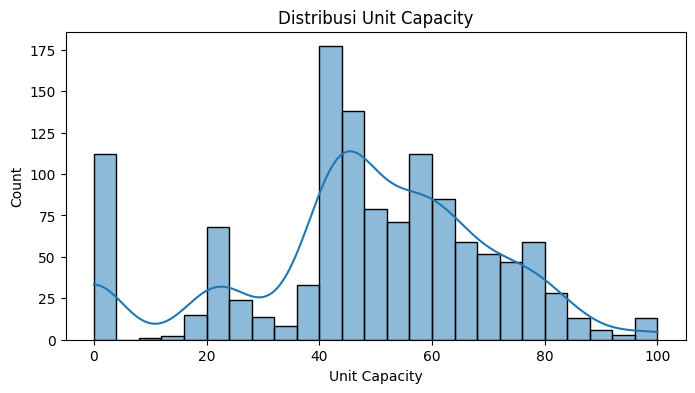

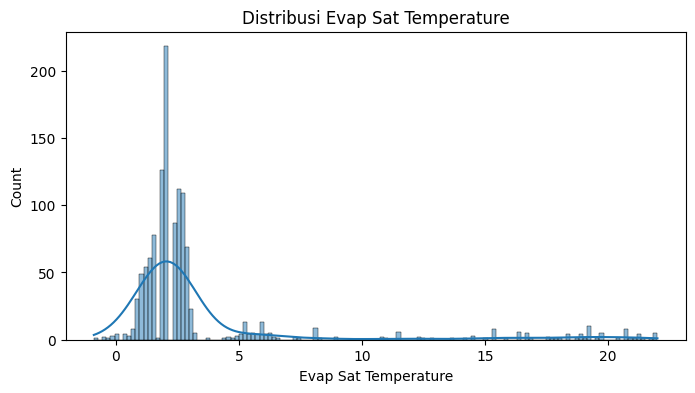

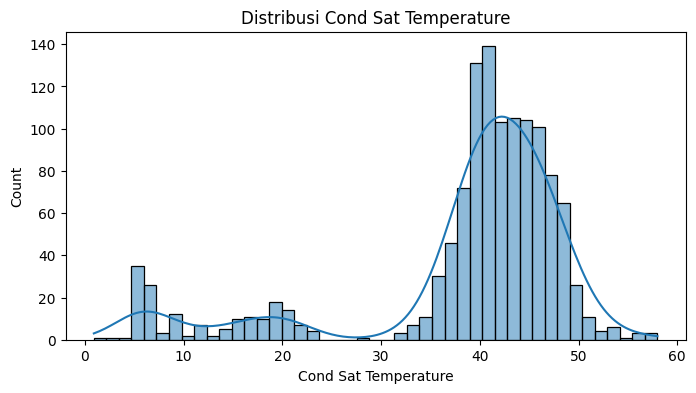

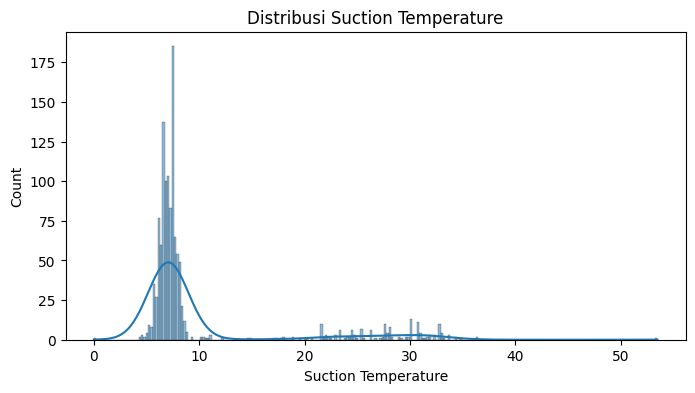

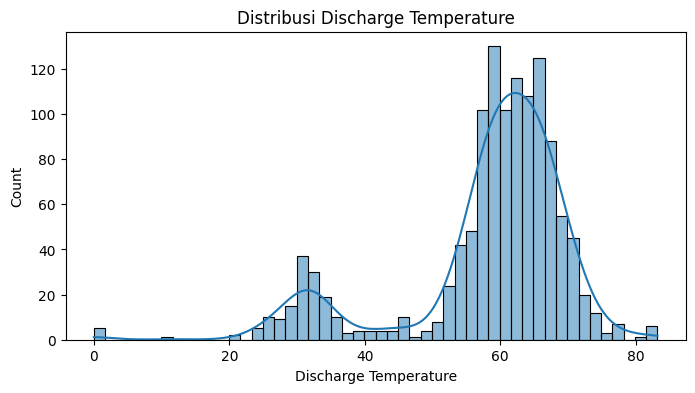

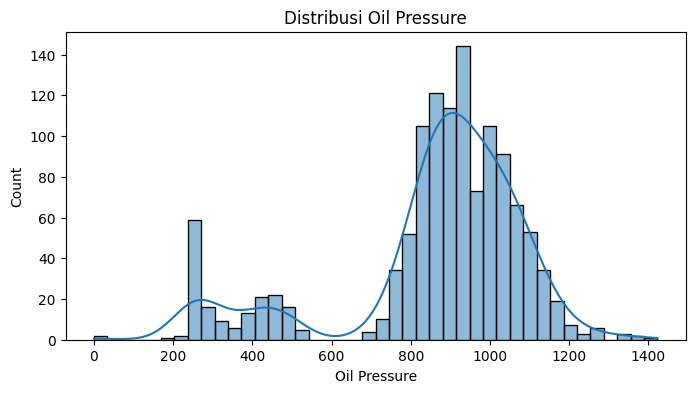

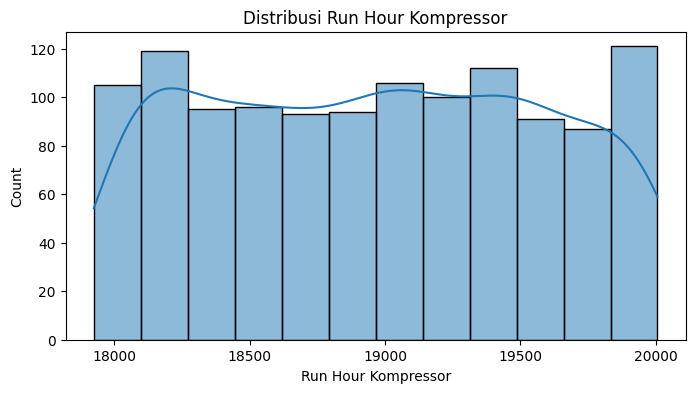

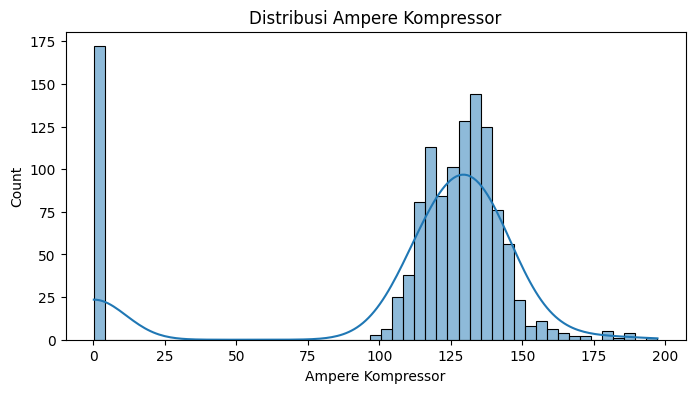

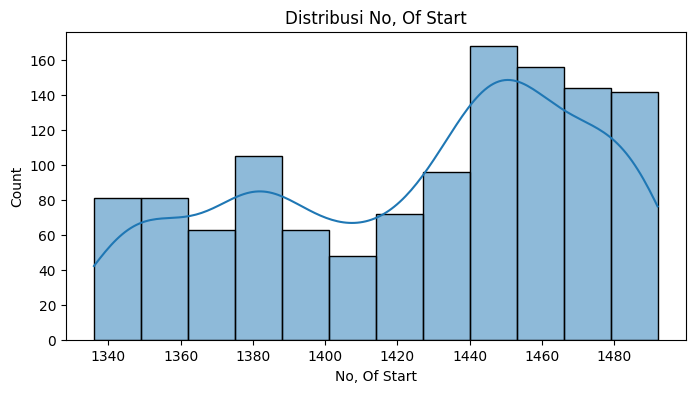

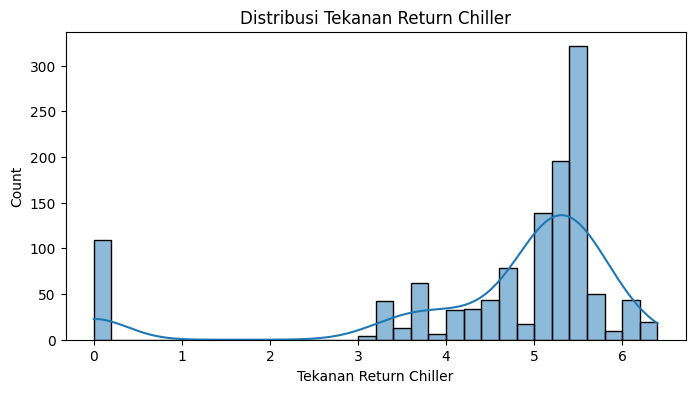

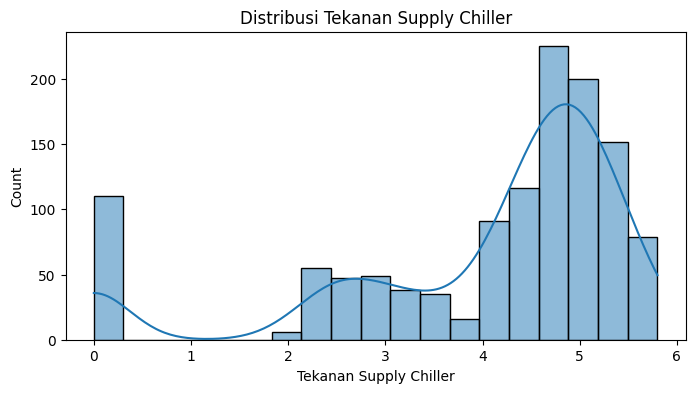

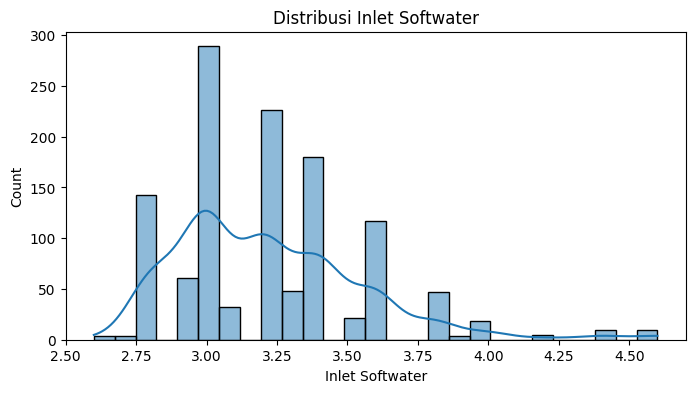

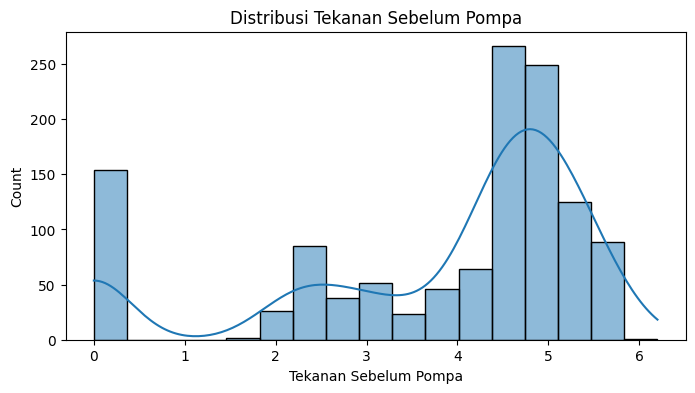

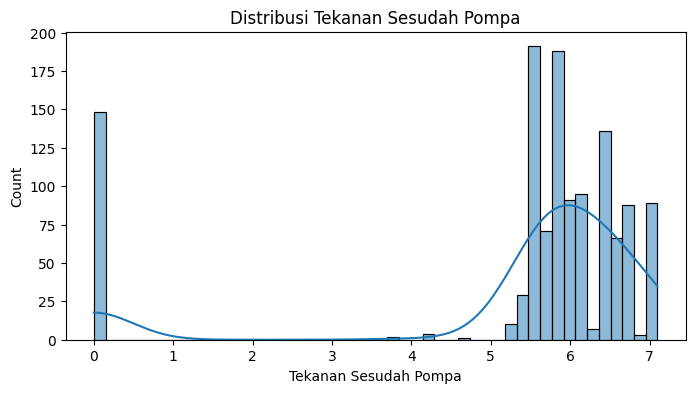

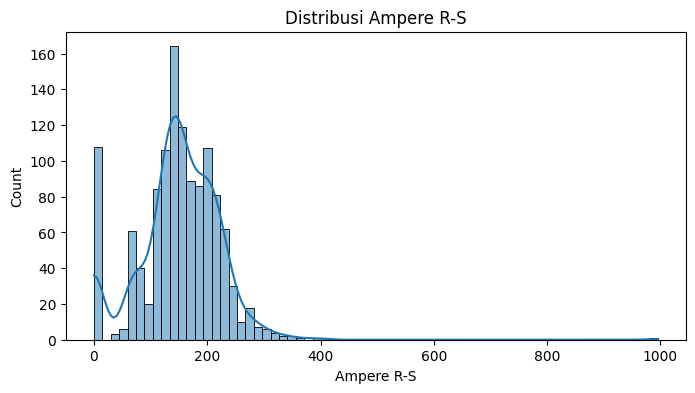

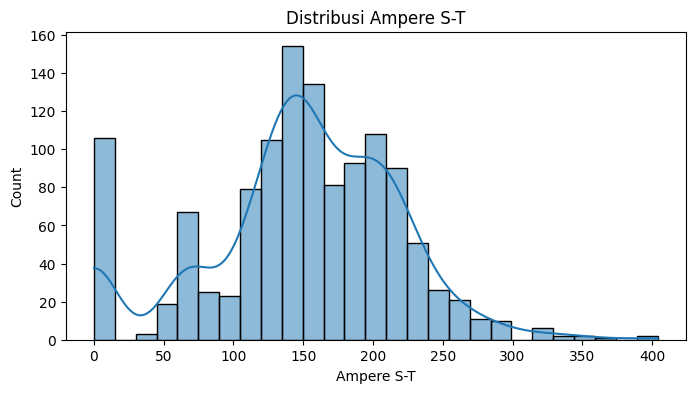

In [3]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tampilan matplotlib
%matplotlib inline

# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Memeriksa missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualisasi distribusi variabel numerik
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()

## 3. Feature Selection

Feature selection adalah proses memilih fitur yang paling relevan untuk digunakan dalam model Machine Learning.

Penggunaan model machine learning seperti XGBoost dalam konteks manufaktur, khususnya pada dataset Chiller, adalah contoh bagus dari aplikasi teknologi canggih dalam industri. Berikut adalah contoh use case atau kasus penggunaan yang bisa Anda kembangkan:

Use Case: Prediksi Ampere Kompressor dalam Sistem Chiller
1. **Latar Belakang dan Kebutuhan:**
* Industri: Manufaktur (khususnya yang menggunakan sistem pendinginan).
* Masalah: Fluktuasi ampere kompressor dapat menandakan masalah efisiensi atau kerusakan potensial dalam sistem chiller.
* Kebutuhan: Mendeteksi perubahan atau anomali dalam ampere kompressor untuk pencegahan kerusakan dan peningkatan efisiensi energi.

2. **Pengumpulan dan Persiapan Data:**
* Cond Sat Temperature: Suhu jenuh kondensor.
* Oil Pressure: Tekanan oli dalam sistem.
* Suction Temperature: Suhu hisap.
* Discharge Temperature: Suhu buang.
* Ampere Compressor: Target prediksi (variabel dependen).

**Target: Ampere Kompressor**

**Ampere Kompressor** mengukur arus listrik yang dikonsumsi oleh kompressor. Dalam konteks chiller, ini adalah indikator penting dari konsumsi energi. Mengoptimalkan konsumsi energi kompressor tidak hanya menghemat biaya tetapi juga dapat meningkatkan umur peralatan dan efisiensi operasional.

**Fitur dan Pengaruhnya**
1. **Cond Sat Temperature (Suhu Jenuh Kondensator)**
  * Pengaruh: Suhu jenuh kondensator yang lebih tinggi dapat menunjukkan bahwa kondensator harus mengeluarkan lebih banyak panas, yang mengakibatkan kompressor bekerja lebih keras. Ini sering terkait dengan kondisi lingkungan atau beban pendinginan yang tinggi.
  * Analisis: Menganalisis korelasi antara suhu jenuh kondensator dan ampere kompressor akan membantu memahami seberapa efisien kondensator bekerja dan bagaimana hal ini mempengaruhi konsumsi energi kompressor.
2. **Discharge Temperature (Suhu Pembuangan)**
  * Pengaruh: Suhu pembuangan tinggi biasanya mengindikasikan bahwa kompressor bekerja lebih keras, yang meningkatkan konsumsi energi. Hal ini bisa disebabkan oleh berbagai faktor, termasuk beban termal tinggi, kondisi operasional yang tidak optimal, atau isu pemeliharaan.
  * Analisis: Dengan menganalisis hubungan antara suhu pembuangan dan ampere kompressor, kita dapat mengidentifikasi kondisi di mana efisiensi energi berkurang.

3. **Oil Pressure (Tekanan Oli)**
  * Pengaruh: Tekanan oli yang tidak optimal bisa menyebabkan peningkatan gesekan dan keausan pada kompresor, yang mempengaruhi efisiensi dan konsumsi energinya. Tekanan yang terlalu rendah atau terlalu tinggi sama-sama merugikan.
  * Analisis: Melalui regresi linear, kita dapat menilai seberapa signifikan pengaruh tekanan oli terhadap konsumsi energi kompressor dan menentukan nilai tekanan oli optimal untuk efisiensi maksimal.
  
Dalam konteks pabrik, pemahaman ini sangat berguna untuk mengidentifikasi area di mana efisiensi dapat ditingkatkan, baik melalui pengaturan operasional, pemeliharaan rutin, atau upgrade peralatan. Dengan menerapkan model regresi linear, Anda dapat mengquantifikasi hubungan ini dan menggunakan wawasan tersebut untuk membuat keputusan yang lebih tepat dan efektif dalam mengelola sistem chiller.

**ChatGPT Prompt:**

Berikan code untuk membagi dataset menjadi data training dan testing untuk machine learning. Atur kolom "Cond Sat Temperature", "Oil Pressure", "Suction Temperature", dan "Discharge Temperature" menjadi fitur. Atur kolom "Ampere Kompressor" menjadi target


In [5]:
from sklearn.model_selection import train_test_split

# Memilih fitur-fitur yang akan digunakan
features = ["Cond Sat Temperature", "Oil Pressure", "Suction Temperature", "Discharge Temperature"]
X = df[features]  # Fitur

# Target
y = df["Ampere Kompressor"]

# Memisahkan dataset menjadi data training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data training dan testing
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)


Ukuran X_train: (975, 4)
Ukuran X_test: (244, 4)
Ukuran y_train: (975,)
Ukuran y_test: (244,)


## 4. Training Machine Learning

Untuk melatih model regresi linier menggunakan dataset yang Anda miliki dan kemudian mengevaluasi model tersebut, Anda dapat menggunakan library scikit-learn di Python. Langkah-langkahnya termasuk melatih model dengan data training (X_train dan y_train) dan kemudian mengevaluasi kinerjanya dengan data testing (X_test dan y_test).

**ChatGPT Prompt:**

Berikan code untuk melakukan training machine learning dengan menggunakan XGBoost pada data training, kemudian evaluasi hasil model dengan data testing menggunakan MSE, RMSE, MAE, dan R^2

In [6]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Inisialisasi model XGBoost
model = xgb.XGBRegressor()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi dengan data testing
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 27.065032726652543
Root Mean Squared Error (RMSE): 5.202406436126703
Mean Absolute Error (MAE): 2.000442942720456
R-squared (R^2): 0.9891061026286597



Penjelasan kode:
- `XGBRegressor` dari XGBoost digunakan untuk membuat instance model regresi. Parameter `objective='reg:squarederror'` menentukan bahwa tujuan model adalah regresi dengan squared error sebagai fungsi loss.
- Metode `fit()` digunakan untuk melatih model dengan menggunakan set data pelatihan (`X_train`, `y_train`).
- Metode `predict()` digunakan untuk membuat prediksi pada set data pengujian (`X_test`).
- Metrik evaluasi seperti MSE, RMSE, MAE, dan R^2 dihitung menggunakan hasil prediksi dan nilai sebenarnya (`y_test`).

Pastikan bahwa Anda telah mempersiapkan `X_train`, `X_test`, `y_train`, dan `y_test` dari dataset Anda sebelum menjalankan kode ini. Anda juga dapat menyesuaikan parameter model XGBoost (seperti `learning_rate`, `max_depth`, `n_estimators`, dll.) untuk meningkatkan kinerja model sesuai kebutuhan spesifik dataset Anda.

## 5. Fine Tuning Hyperparameter

Fine tuning pada model XGBoost melibatkan penyesuaian parameter untuk meningkatkan kinerja model. Kita dapat menggunakan `GridSearchCV` dari Scikit-learn untuk mencari kombinasi parameter terbaik.

**ChatGPT Prompt**

Berikan code untuk melakukan fine tuning hyperparameter pada model XGBoost dan uji hasilnya

In [8]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Inisialisasi model XGBoost
model = xgb.XGBRegressor()

# Daftar hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.2, 0.3],
    'gamma': [0, 0.1, 0.2]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Melatih model dengan data training
grid_search.fit(X_train, y_train)

# Mendapatkan hyperparameter terbaik
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Menguji model dengan hyperparameter terbaik pada data testing
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=4, n_estimators=100; 

Hasil berikut merupakan output dari proses fine-tuning hyperparameter menggunakan Grid Search pada model XGBoost. Output tersebut memberikan informasi tentang kombinasi hyperparameter terbaik yang telah ditemukan selama pencarian.

1. `gamma`: Nilai hyperparameter gamma yang terbaik adalah 0.1. Gamma adalah parameter yang mengontrol regularisasi model dengan mengurangi kompleksitas pohon. Nilai yang lebih rendah cenderung menghasilkan model yang lebih kompleks.

2. `learning_rate`: Nilai hyperparameter learning_rate yang terbaik adalah 0.1. Learning rate adalah langkah pembelajaran yang digunakan oleh algoritma XGBoost. Nilai yang lebih kecil mengakibatkan pembelajaran yang lebih lambat tetapi seringkali menghasilkan model yang lebih baik.

3. `max_depth`: Nilai hyperparameter max_depth yang terbaik adalah 3. Max_depth mengontrol kedalaman maksimum pohon keputusan dalam model XGBoost. Nilai yang lebih rendah menghasilkan model yang lebih sederhana dengan risiko underfitting, sementara nilai yang lebih tinggi dapat menyebabkan overfitting.

4. `n_estimators`: Nilai hyperparameter n_estimators yang terbaik adalah 200. Ini adalah jumlah pohon keputusan yang digunakan dalam model XGBoost. Nilai yang lebih tinggi umumnya meningkatkan performa model, tetapi juga memerlukan waktu pelatihan yang lebih lama.

Dengan kombinasi hyperparameter ini, model XGBoost telah menghasilkan hasil yang optimal selama proses fine-tuning. Ini adalah konfigurasi hyperparameter yang dapat digunakan untuk melatih model XGBoost dengan performa yang baik dalam tugas yang Anda kerjakan.

## 6. Actual vs Predicted

**ChatGPT Prompt:**

Berikan code untuk menampilkan beberapa baris pertama dari DataFrame yang membandingkan nilai sebenarnya dan prediksi

In [11]:
# Membuat DataFrame untuk membandingkan nilai sebenarnya dan prediksi
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Menampilkan beberapa baris pertama dari DataFrame
print(comparison_df.head())

      Actual   Predicted
542    126.9  128.027054
259    133.0  132.566391
43       0.2    0.440988
1009   147.7  146.307648
753    118.2  117.912270
